<a href="https://colab.research.google.com/github/Andre2605/A-B-Testing-Experimentation/blob/main/A_B_Testing_Marketing_for_Hat_Selling_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Context**

A hat-selling company, called Crown Company, has been running paid advertisements using Facebook Ads to sell their products. However, due to the massive growth of TikTok Ads, they are now considering switching and expanding their market presence on TikTok as well.

To make an informed decision, they want to conduct a test to measure the effectiveness of TikTok Ads in driving hat sales. The average selling price of a hat is $5.

After conducting a 40-day experiment by allocating their marketing budget between TikTok and Facebook, the sales data has been collected to compare the performance of these two platforms.

**Business Problem**

As a company that will advertise on Facebook and Tiktok, we want to understand which option is more advantageous for us.

1. Which of these two options will increase our number of earnings?
2. Which of these two options will increase our number of CTR?
3. Is there a significant difference between the two options?


**Task Details**

1. Importing Libraries and Data
2. Data Preprocessing
3. Analyse
4. A/B Test
5. Summary and Further Discussion

**Attribute Information:**

- Impression : Ad impressions
- Click : Number of clicks on the displayed ad
- Purchase : The number of products purchased after the ads clicked
- Earning: Earnings after purchased products

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries and Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
control_df = pd.read_excel("/content/drive/MyDrive/Data Sets/ab_testing.xlsx", sheet_name='Control Group')# maximum bidding
treatment_df = pd.read_excel("/content/drive/MyDrive/Data Sets/ab_testing.xlsx", sheet_name='Test Group') # average bidding

In [ ]:
control_df.head()

,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179


In [ ]:
treatment_df.head()

,Impression,Click,Purchase,Earning
0,120103.503796,3216.547958,702.160346,1939.611243
1,134775.943363,3635.082422,834.054286,2929.405820
2,107806.620788,3057.143560,422.934258,2526.244877
3,116445.275526,4650.473911,429.033535,2281.428574
4,145082.516838,5201.387724,749.860442,2781.697521


In [ ]:
# Compare the description of both group of data ( MAXIMUM BIDDING VS AVERAGE BIDDING )
desc_compare_df = pd.DataFrame ({"Control_Impression": control_df["Impression"].describe (),"Treatment_Impression": treatment_df["Impression"].describe (),
                                 "Control_Click": control_df["Click"].describe (),"Treatment_Click": treatment_df["Click"].describe (),
                                 "Control_Purchase": control_df["Purchase"].describe (),"Treatment_Purchase": treatment_df["Purchase"].describe (),
                                 "Control_Earning": control_df["Earning"].describe (),"Treatment_Earning": treatment_df["Earning"].describe ()})

desc_compare_df

,Control_Impression,Treatment_Impression,Control_Click,Treatment_Click,Control_Purchase,Treatment_Purchase,Control_Earning,Treatment_Earning
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,101711.449068,120512.411758,5100.657373,3967.549761,550.894059,582.106097,1908.568300,2514.890733
std,20302.157862,18807.448712,1329.985498,923.095073,134.108201,161.152513,302.917783,282.730852
min,45475.942965,79033.834921,2189.753157,1836.629861,267.028943,311.629515,1253.989525,1939.611243
25%,85726.690349,112691.970770,4124.304129,3376.819024,470.095533,444.626828,1685.847205,2280.537426
50%,99790.701078,119291.300775,5001.220602,3931.359804,531.206307,551.355732,1975.160522,2544.666107
75%,115212.816543,132050.578933,5923.803596,4660.497911,637.957088,699.862360,2119.802784,2761.545405
max,147539.336329,158605.920483,7959.125069,6019.695079,801.795020,889.910460,2497.295218,3171.489708


# Data Preprocessing

In [ ]:
control_df['Purchase'] = control_df['Purchase'].round().astype(int)
control_df['Impression'] = control_df['Impression'].round().astype(int)
control_df['Click'] = control_df['Click'].round().astype(int)

In [ ]:
treatment_df['Purchase'] = treatment_df['Purchase'].round().astype(int)
treatment_df['Impression'] = treatment_df['Impression'].round().astype(int)
treatment_df['Click'] = treatment_df['Click'].round().astype(int)

Rounding the `Purchase`,`Impression`,`Click` colums

In [ ]:
control_df.isnull().sum()

Impression    0
Click         0
Purchase      0
Earning       0
dtype: int64

In [ ]:
treatment_df.isnull().sum()

Impression    0
Click         0
Purchase      0
Earning       0
dtype: int64

**Null value is not detected in both data group**

In [ ]:
control_df.corr()

,Impression,Click,Purchase,Earning
Impression,1.000000,-0.311438,0.214302,0.107047
Click,-0.311438,1.000000,0.057687,-0.356688
Purchase,0.214302,0.057687,1.000000,0.062160
Earning,0.107047,-0.356688,0.062160,1.000000


In [ ]:
treatment_df.corr()

,Impression,Click,Purchase,Earning
Impression,1.000000,-0.202757,0.138050,0.106642
Click,-0.202757,1.000000,-0.074514,0.197784
Purchase,0.138050,-0.074514,1.000000,0.102784
Earning,0.106642,0.197784,0.102784,1.000000


**There is no significant correlation between variables in both datasets**

# Analyse


## Control Group

In [ ]:
control_df["Click_Per_Impression"] = control_df["Click"] / control_df["Impression"] #CTR
control_df["Purchase_Per_Click"] = control_df["Purchase"] / control_df["Click"] #EPC
control_df["Earning_Per_Click"] = control_df["Earning"] / control_df["Click"] #EPC
control_df.head()

,Impression,Click,Purchase,Earning,Click_Per_Impression,Purchase_Per_Click,Earning_Per_Click
0,82529,6090,665,2311.277143,0.073792,0.109195,0.379520
1,98050,3383,315,1742.806855,0.034503,0.093113,0.515166
2,82696,4168,458,1797.827447,0.050401,0.109885,0.431341
3,109914,4911,487,1696.229178,0.044680,0.099165,0.345394
4,108458,5988,441,1543.720179,0.055210,0.073647,0.257802


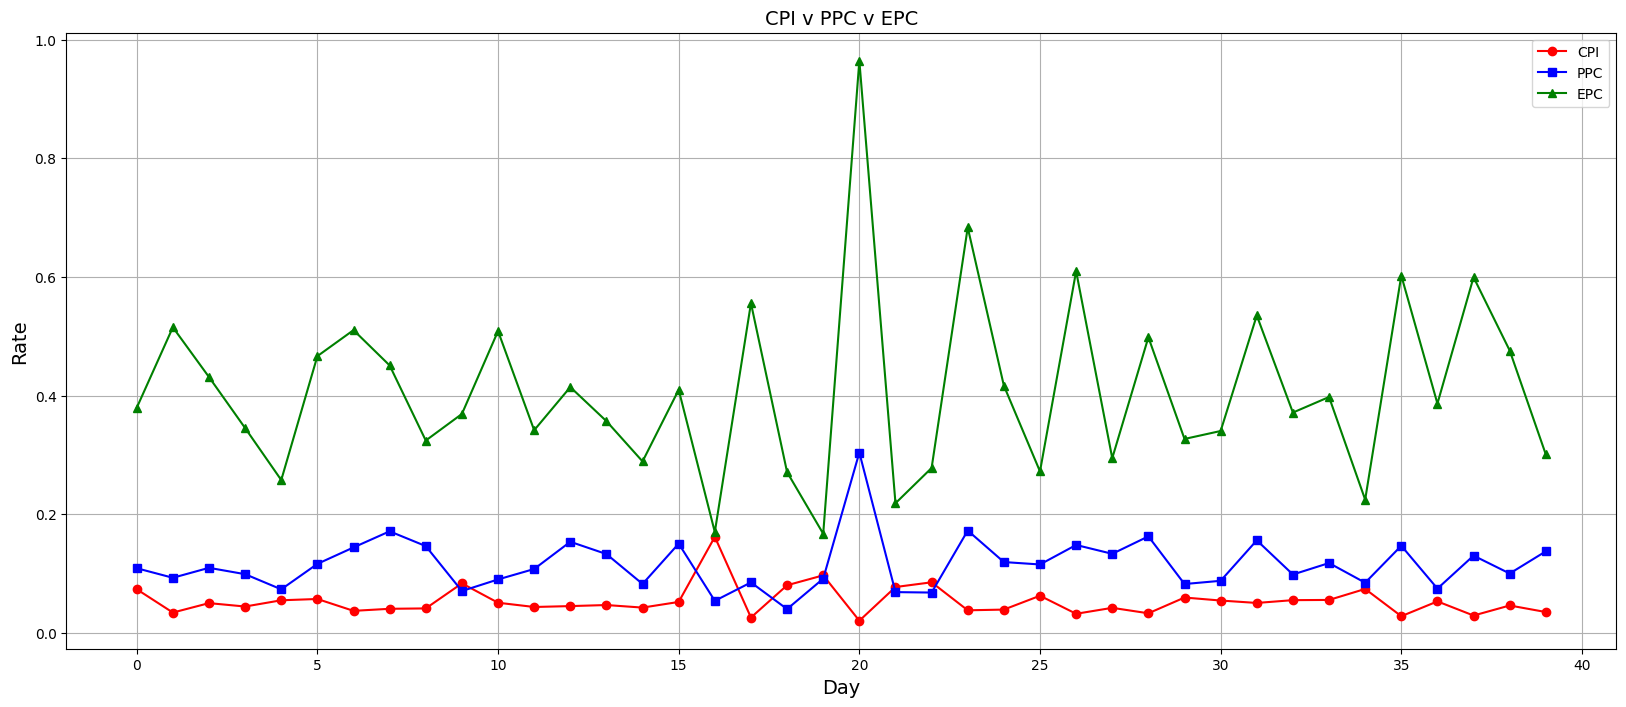

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(control_df['Click_Per_Impression'], color='red', marker='o', label = 'CPI')
plt.plot(control_df['Purchase_Per_Click'], color='blue', marker='s', label = 'PPC')
plt.plot(control_df['Earning_Per_Click'], color='green', marker='^', label = 'EPC')
plt.title('CPI v PPC v EPC', fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Rate', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
control_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.0,101711.450000,20302.122984,45476.000000,85726.750000,99790.500000,115212.500000,147539.000000
Click,40.0,5100.625000,1329.957772,2190.000000,4124.250000,5001.500000,5923.500000,7959.000000
Purchase,40.0,550.900000,134.110517,267.000000,470.500000,531.500000,638.000000,802.000000
Earning,40.0,1908.568300,302.917783,1253.989525,1685.847205,1975.160522,2119.802784,2497.295218
Click_Per_Impression,40.0,0.053618,0.024849,0.020760,0.039219,0.048795,0.057985,0.162064
Purchase_Per_Click,40.0,0.115924,0.045399,0.040399,0.085171,0.109540,0.144823,0.304110
Earning_Per_Click,40.0,0.408355,0.153715,0.167320,0.299324,0.383050,0.500968,0.964326


Based on the "CPI v PPC v EPC" graph, over a span of 40 days, the number of users who clicked on the ads after viewing them was not very high (approximately averaging at 5%). However, if a user does click on the displayed ads, there is an average possibility of achieving a sales conversion rate of 11%. This is quite good because out of 100 ad clicks, 11 products are sold.

In terms of the average revenue generated from using Facebook Ads, the company earned $1908 over the course of 40 days. Looking at the paid ad clicks, the company's revenue (earning) is proportional to the user clicks, amounting to 40%. This means that for every 100 clicks that occur, the company can generate an earning of `$40`.

Moreover, there is additional information that suggests the absence of any noticeable trends over the 40-day period when we examine the graph. All the clicks, purchases, and earnings obtained by the company are merely events that occur spontaneously and naturally. This can be observed by the fact that even with a low CPI, the company managed to achieve the highest EPC during the 40-day period. However, it is important to conduct further testing and gather additional data to statistically support such observations.

## Treatment Group

In [ ]:
treatment_df["Click_Per_Impression"] = treatment_df["Click"] / treatment_df["Impression"] #CTR
treatment_df["Purchase_Per_Click"] = treatment_df["Purchase"] / treatment_df["Click"] #EPC
treatment_df["Earning_Per_Click"] = treatment_df["Earning"] / treatment_df["Click"] #EPC
treatment_df.head()

,Impression,Click,Purchase,Earning,Click_Per_Impression,Purchase_Per_Click,Earning_Per_Click
0,120104,3217,702,1939.611243,0.026785,0.218216,0.602925
1,134776,3635,834,2929.405820,0.026971,0.229436,0.805889
2,107807,3057,423,2526.244877,0.028356,0.138371,0.826380
3,116445,4650,429,2281.428574,0.039933,0.092258,0.490630
4,145083,5201,750,2781.697521,0.035848,0.144203,0.534839


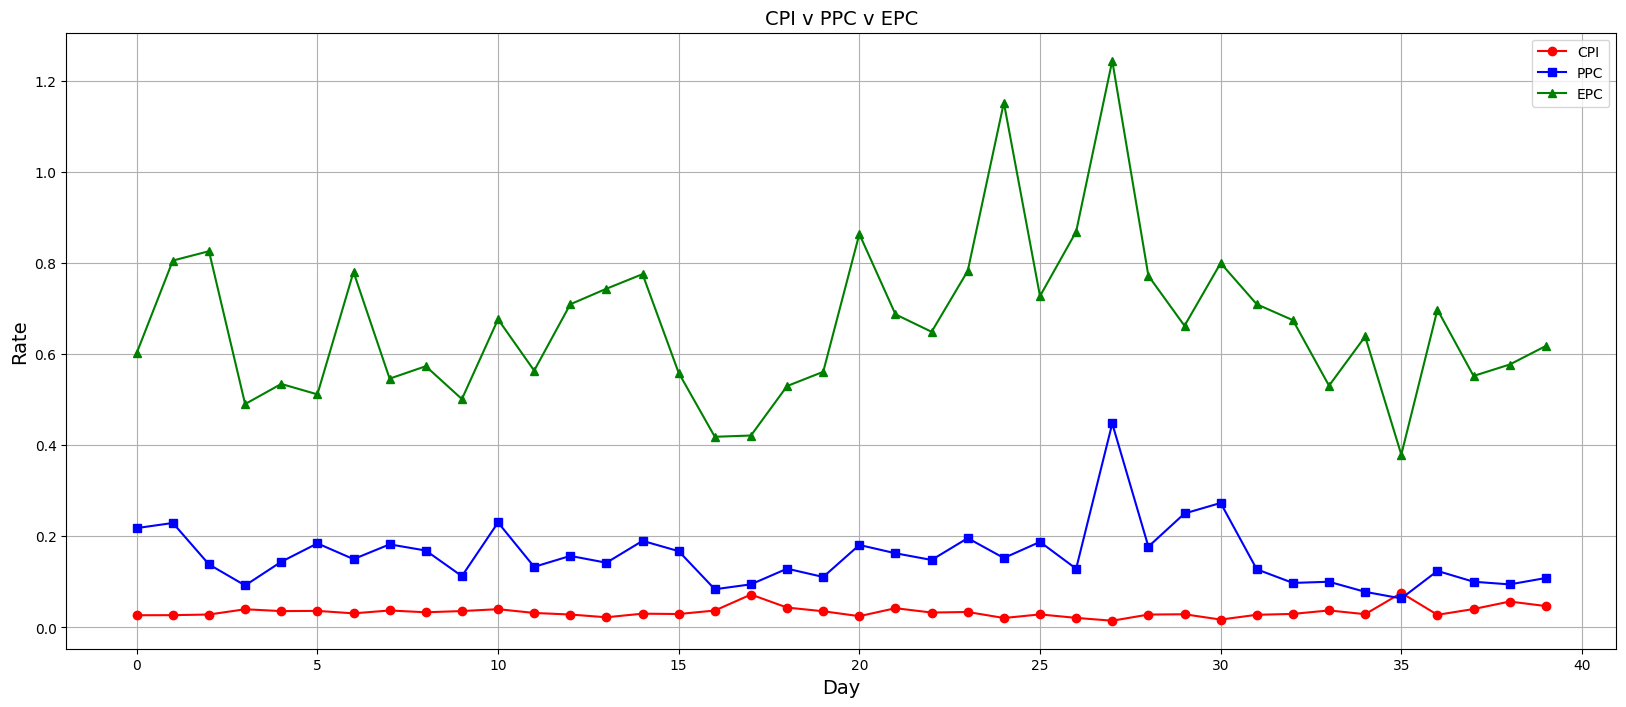

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(treatment_df['Click_Per_Impression'], color='red', marker='o', label = 'CPI')
plt.plot(treatment_df['Purchase_Per_Click'], color='blue', marker='s', label = 'PPC')
plt.plot(treatment_df['Earning_Per_Click'], color='green', marker='^', label = 'EPC')
plt.title('CPI v PPC v EPC', fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Rate', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
treatment_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.0,120512.425000,18807.466616,79034.000000,112692.250000,119291.500000,132050.750000,158606.000000
Click,40.0,3967.550000,923.071766,1837.000000,3376.500000,3931.500000,4660.250000,6020.000000
Purchase,40.0,582.050000,161.175164,312.000000,444.750000,551.000000,699.750000,890.000000
Earning,40.0,2514.890733,282.730852,1939.611243,2280.537426,2544.666107,2761.545405,3171.489708
Click_Per_Impression,40.0,0.034176,0.012256,0.014735,0.028157,0.031355,0.037262,0.075749
Purchase_Per_Click,40.0,0.156551,0.068164,0.063645,0.110265,0.146206,0.183013,0.448013
Earning_Per_Click,40.0,0.668300,0.175652,0.379517,0.550919,0.655944,0.773368,1.244809


Based on the "CPI v PPC v EPC" graph, for the treatment group, it was found that the average impressions on the new platform (TikTok) experienced an increase of 20,000. However, this increase in impressions was not accompanied by a rise in ad clicks. The average number of clicks on paid ads on TikTok decreased compared to Facebook. Nevertheless, despite having fewer clicks, TikTok ads managed to generate a higher average number of purchases and earnings over the 40-day period compared to Facebook ads. This increase amounted to 5% for product sales and 31% for revenue.

Due to the lower number of clicks compared to Facebook ads, the click-through rate (CTR) generated by ads on TikTok decreased to 3%. However, as explained earlier, the purchase per click (15%) and earning per click (67%) also experienced an increase. This means that paid ads on TikTok are more effective in persuading users to make purchases based on the ads they have seen, thereby boosting the company's revenue even further.

Based on the trend observed in the graph over a 40-day period, it was found that sales using TikTok Ads exhibited a more pronounced positive trend from day 21 to day 28. In contrast, Facebook Ads only experienced an increase on day 21, followed by a fluctuating or random trend. It can be said that during those days, TikTok ads demonstrated a higher effectiveness in capturing the interest of buyers, as they started to become aware of the availability of good products or, in other words, there was an increase in product awareness during those specific days.

# A/B Testing

## Assumptions Required

In order to apply an AB Test, the **Normality** and **Variance homogeneity** assumptions should be satisfied.

If normality and variance homogeneity is **provided**, an independent **two-sample t-test (parametric test)** is applied. If normality and homogeneity of variance are **not provided**, the **Mann-Whitney U test (non-parametric test)** is performed.

### IMPORTANT THINGS TO REMEMBER :
1. The Normality assumption assumes that the data in both the control and treatment groups follow a normal distribution. This assumption is important because many statistical tests, such as t-tests, rely on the assumption of normality to accurately analyze the data and make valid inferences. Violations of this assumption can lead to incorrect conclusions.

2. The Variance homogeneity assumption states that the variances of the data in the control and treatment groups should be roughly equal. This assumption is crucial because certain statistical tests, like the t-test, assume equal variances when comparing the means of two groups. Violations of this assumption can affect the accuracy and reliability of the test results.

3. By ensuring that the Normality and Variance homogeneity assumptions are met, we can have more confidence in the results of an A/B test and make accurate conclusions about the effectiveness of different treatments or interventions. It is important to assess these assumptions prior to conducting an A/B test to ensure the validity of the results and the reliability of the insights gained from the analysis.

### 1. Normality Check

In [ ]:
import seaborn as sns
from scipy.stats import shapiro,levene,ttest_ind, mannwhitneyu

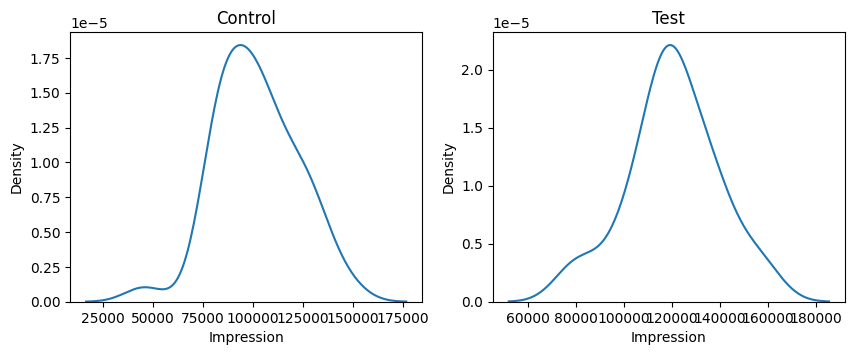

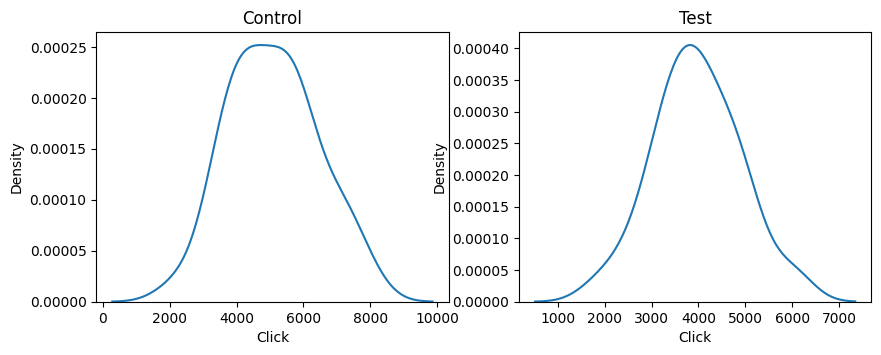

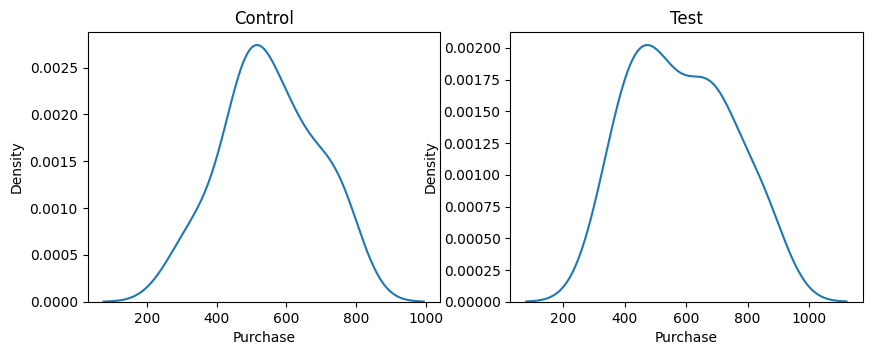

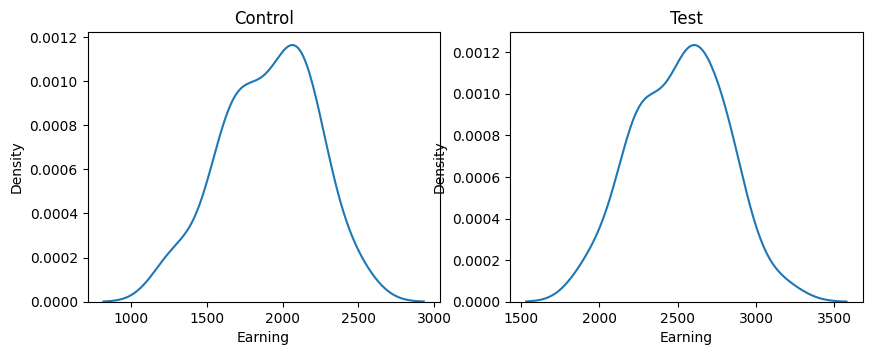

In [ ]:
cols = ['Impression', 'Click', 'Purchase', 'Earning']
for col in cols:
    fig, ax = plt.subplots(1, 2)
    fig.set_figheight(3.5)
    fig.set_figwidth(10)

    sns.kdeplot(data=control_df[col], ax=ax[0])
    sns.kdeplot(data=treatment_df[col], ax=ax[1])

    ax[0].set_title('Control')
    ax[1].set_title('Test')

    plt.show()

From this graph, it is evident that the distribution of data for each variable in the control and treatment data groups follows a normal distribution. However, to ensure the accuracy of these data distributions, it would be better to use the `Shapiro-Wilks test` to examine the validity of the data distribution.

The **Shapiro-Wilks Test** will be applied for the Normality

H0 : There is no statistically significant difference between sample distribution and theoretical normal distribution **IN OTHER WORDS** The data are drawn from a normally distributed population.

H1 : There is statistically significant difference between sample distribution and theoretical normal distribution **IN OTHER WORDS** The data are not drawn from a normally distributed population.

`With alpha = 0.05,`

**H0 is rejected if the p_value is less than 0.05.**

In [ ]:
print('Control Group \n')
for col in cols:
    test_stat, pvalue = shapiro(control_df[col])
    print(col)
    print('Test Stat = %.4f, p-value = %.4f \n' % (test_stat, pvalue))

Control Group 

Impression
Test Stat = 0.9697, p-value = 0.3514 

Click
Test Stat = 0.9844, p-value = 0.8458 

Purchase
Test Stat = 0.9774, p-value = 0.5929 

Earning
Test Stat = 0.9756, p-value = 0.5306 



In [ ]:
print('Treatment Group \n')
for col in cols:
    test_stat, pvalue = shapiro(treatment_df[col])
    print(col)
    print('Test Stat = %.4f, p-value = %.4f \n' % (test_stat, pvalue) )

Treatment Group 

Impression
Test Stat = 0.9720, p-value = 0.4148 

Click
Test Stat = 0.9896, p-value = 0.9700 

Purchase
Test Stat = 0.9589, p-value = 0.1541 

Earning
Test Stat = 0.9780, p-value = 0.6163 



Based on the distribution graphs and the information obtained from the Shapiro-Wilk test, it can be concluded that all variables in both the control and treatment groups have p-values above 0.05, indicating that their data distributions follow a **normal distribution**.


***Conclusions*** : **H0 is not rejected**. So there is not enough evidence that there is statistically significant difference between sample distribution and theoretical normal distribution. So, the data are drawn from a normally distributed population

### 2. Variance Homogenity

`Levene’s Test` will be applied for the Homogeneity of variances

H0: There is no statistically significant difference between the variance of variance of the related variables of the 2 groups `IN OTHER WORDS` The variances of the groups are equal.

H1: There is a statistically significant difference between the variance of variance of the related variables of the 2 groups `IN OTHER WORDS` The variances of the groups are not equal.

`With alpha = 0.05,`

**H0 is rejected if the p_value is less than 0.05.**


In [ ]:
for col in cols:
    ttest_lev, p_value_lev = levene (control_df[col], treatment_df[col])
    print(col)
    print ("Ftest statistics: {}\np_value: {}\n".format (ttest_lev, p_value_lev))

Impression
Ftest statistics: 0.5864209562748677
p_value: 0.4461176210531458

Click
Ftest statistics: 6.307972266621279
p_value: 0.014085731864525894

Purchase
Ftest statistics: 2.640298470042385
p_value: 0.10821824555495507

Earning
Ftest statistics: 0.35323781392537446
p_value: 0.5540060067717659



The obtained p-values, **except for Click**, exceed the significance level of 0.05, indicating that **we fail to reject the null hypothesis (H0)**. Consequently, we conclude that there is **no** statistically significant difference between the variance distributions of the Impression, Purchase, and Earning values in the two groups.

**However**, the p-value for Click is below 0.05, **leading us to reject the null hypothesis (H0)**. This suggests that **there is a statistically significant difference in the variance distributions** of the Click values between the two groups.

## Implementation

Since the Impression, Purchase, and Earning variables satisfy the assumptions of normality and variance homogeneity, an independent two-sample t-test / Pooled Variance T-test (parametric test) will be used.

However, despite the assumption of normality being met for the Click variable, the assumption of variance homogeneity is violated. This indicates that the variances of the Click variable differ significantly between the two groups. So, it is recommended to employ the separate variance T-test, also known as Welch's T-test.

### 1. Pooled Variance T-test

`Mean` -> `Independent` -> `Variance Unknown` -> Normally distributed and variance homogenity are tested (Pass the test) -> Want to test the mean and assume that they have equal Population Variance -> `Pooled Variance T-test` (Parametric Test)

The Independent Two-Sample T Test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different.
```
Hypotheses :

H0: μ_facebook ≥ μ_tiktok (The mean from Facebook Ads is greater than or equal to the mean from Tiktok Ads.)

H1: μ_facebook < μ_tiktok (The mean from Facebook Ads is less than the mean from Tiktok Ads.)
```

#### Impression

In [ ]:
ttest_ind_Imp, p_value_ind_Imp = ttest_ind (control_df["Impression"], treatment_df["Impression"], equal_var=True, alternative='less')
print ("ttest statistics: {}\np_value: {}".format (ttest_ind_Imp, p_value_ind_Imp))

ttest statistics: -4.296602570348743
p_value: 2.4773329662602926e-05


Conclusion: Based on the Pooled Variance T-test results, with a t-test statistic of -4.2966 and a p-value of 2.4773e-05, we can reject the null hypothesis (H0). This provides strong evidence to suggest that the mean impression from Facebook Ads is significantly less than the mean impression from TikTok Ads.

The negative t-test statistic indicates that the mean impression from Facebook Ads is lower than the mean impression from TikTok Ads. The very low p-value suggests that the observed difference in means is highly unlikely to occur by chance alone.

These findings indicate that TikTok Ads have a greater impact in terms of impressions compared to Facebook Ads. Businesses or advertisers may consider allocating more resources to TikTok Ads to maximize their reach and exposure, as it appears to yield a higher average impression.

In summary, the Pooled Variance T-test results support the conclusion that the mean impression from Facebook Ads is significantly lower than the mean impression from TikTok Ads. This information can guide marketers and advertisers in making informed decisions about their advertising strategies and budget allocation.

#### Purchase

In [ ]:
ttest_ind_pur, p_value_ind_pur = ttest_ind (control_df["Purchase"], treatment_df["Purchase"], equal_var=True, alternative='less')
print ("ttest statistics: {}\np_value: {}".format (ttest_ind_pur, p_value_ind_pur))

ttest statistics: -0.9396022967737262
p_value: 0.1751611381967787


Conclusion: Based on the Pooled Variance T-test results, with a t-test statistic of -0.9396 and a p-value of 0.1752, we fail to reject the null hypothesis (H0). This indicates that there is not enough evidence to suggest a significant difference in the mean number of purchases between Facebook Ads and TikTok Ads.

The t-test statistic being close to zero and the p-value being relatively high suggest that any observed difference in means is likely due to random variation rather than a true difference between the two groups.

These findings indicate that the mean number of purchases from Facebook Ads is not significantly different from the mean number of purchases from TikTok Ads. Therefore, both advertising platforms may have a similar impact in terms of generating sales for the company.

In summary, based on the Pooled Variance T-test results and the provided hypothesis, we do not find sufficient evidence to support the claim that the mean number of purchases differs between Facebook Ads and TikTok Ads. This information suggests that the effectiveness of the two platforms in driving purchase behavior may be comparable.

#### Earning

In [ ]:
ttest_ind_earn, p_value_ind_earn = ttest_ind (control_df["Earning"], treatment_df["Earning"], equal_var=True, alternative='less')
print ("ttest statistics: {}\np_value: {}".format (ttest_ind_earn, p_value_ind_earn))

ttest statistics: -9.254514649275333
p_value: 1.732329764230639e-14


Conclusion: Based on the Pooled Variance T-test results, with a t-test statistic of -9.2545 and an extremely low p-value of 1.7323e-14, we can confidently reject the null hypothesis (H0). This provides strong evidence to suggest that the mean revenue (earning) from Facebook Ads is significantly less than the mean revenue from TikTok Ads.

The highly negative t-test statistic indicates that the mean revenue from Facebook Ads is substantially lower than the mean revenue from TikTok Ads. The extremely low p-value suggests that the observed difference in means is highly unlikely to occur by chance alone.

These findings indicate that TikTok Ads generate significantly higher revenue compared to Facebook Ads. Businesses or advertisers may consider focusing more on TikTok Ads to maximize their revenue potential.

In summary, the Pooled Variance T-test results support the conclusion that the mean revenue from Facebook Ads is significantly lower than the mean revenue from TikTok Ads. This information can guide marketers and advertisers in making informed decisions about their advertising strategies and resource allocation to optimize revenue generation.

### 2. Separated Variance T-test

The separate variance T-test, also known as Welch's T-test, is a statistical test used to compare the means of two independent groups when the assumption of equal variances is violated. It is a robust alternative to the standard T-test when the variances between the groups are significantly different.

```
Hypotheses :

H0: μ_facebook ≥ μ_tiktok (The mean from Facebook Ads is greater than or equal to the mean from Tiktok Ads.)

H1: μ_facebook < μ_tiktok (The mean from Facebook Ads is less than the mean from Tiktok Ads.)
```

In [ ]:
ttest_ind_earn, p_value_ind_earn = ttest_ind (control_df["Click"], treatment_df["Click"], equal_var=False, alternative='less')
print ("ttest statistics: {}\np_value: {}".format (ttest_ind_earn, p_value_ind_earn))

ttest statistics: 4.4265730933875185
p_value: 0.9999826434924136


Conclusion: Based on the Separated Variance T-test results, with a t-test statistic of 4.4266 and a p-value of 0.99998, we fail to reject the null hypothesis (H0). This indicates that there is not enough evidence to suggest a significant difference in the mean number of clicks between Facebook Ads and TikTok Ads.

The positive t-test statistic suggests that the mean number of clicks from Facebook Ads is slightly higher than the mean number of clicks from TikTok Ads. However, the very high p-value indicates that this observed difference is likely due to random variation and not a true difference between the two groups.

These findings indicate that the mean number of clicks from Facebook Ads is not significantly different from the mean number of clicks from TikTok Ads. Both advertising platforms may have a similar impact in terms of generating user engagement and clicks.

In summary, based on the Separated Variance T-test results and the provided hypothesis, we do not find sufficient evidence to support the claim that the mean number of clicks differs between Facebook Ads and TikTok Ads. This suggests that the effectiveness of the two platforms in driving click-through rates may be comparable.

### Additional test for proportion (Rate)

**Two Group Ratio Comparison (Two Sample Ratio Test)**

The reason to use the Z-proportion test for comparing the rate between two groups, is as follows:

1. Categorical Data: Click_Per_Impression (or other rates) is a categorical variable representing the proportion or rate of a certain event.
For example : click per impression; It is a binary outcome, indicating whether a click occurred or not. **Categorical variables are often analyzed using proportion-based tests**.

2. Two Independent Groups: The Z-proportion test is suitable for comparing proportions between two independent groups. It allows you to assess if there is a statistically significant difference in the proportions or rates of a specific categorical variable between the two groups.


### Manually checking for the mean

In [ ]:
control_df["Click_Per_Impression"].mean(),treatment_df["Click_Per_Impression"].mean()

(0.05361771682371008, 0.03417596901675688)

In [ ]:
control_df["Purchase_Per_Click"].mean(),treatment_df["Purchase_Per_Click"].mean()

(0.11592362548153431, 0.156550878774025)

In [ ]:
control_df["Earning_Per_Click"].mean(),treatment_df["Earning_Per_Click"].mean()

(0.4083546630067011, 0.6683004095017122)

- Click_Per_Impression : The averages of the two groups seem to close.
- Purchase_Per_Click : The averages of the two groups seem to close.
- Earning_Per_Click : The averages of the two groups seem to be differ.

### Using the Z-proportion Test

`With alpha = 0.05`

```
Hypotheses:

H0: The proportion in Facebook Ads is greater than or equal to the proportion in Tiktok Ads.

H1: The proportion in Facebook Ads is less than the proportion in Tiktok Ads.
```

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
purchase_sum = np.array([control_df["Purchase"].sum(), treatment_df["Purchase"].sum()])

click_sum = np.array([control_df["Click"].sum(), treatment_df["Click"].sum()])

impression_sum = np.array([control_df["Impression"].sum(), treatment_df["Impression"].sum()])

earning_sum = np.array([control_df["Earning"].sum(), treatment_df["Earning"].sum()])

#### Click Per Impression

In [ ]:
ztest_click_imp, p_click_imp = proportions_ztest (click_sum, impression_sum,alternative='smaller')
print('Test Stat = %.4f, p-value = %.4f' % (ztest_click_imp, p_click_imp))

Test Stat = 129.3283, p-value = 1.0000


**Conclusions**

Based on the Z Proportion Test results, with a test statistic of 129.3283 and a p-value of 1.0000, we fail to reject the null hypothesis (H0). This suggests that there is not enough evidence to support the claim that the proportion of clicks per impression in Facebook Ads is significantly lower than the proportion in TikTok Ads.

The test statistic being significantly high and the p-value being equal to 1.0000 indicate that the observed difference in proportions is highly likely due to random variation and not a true difference between the two groups.

From a statistical perspective, these findings suggest that the proportion of clicks per impression in Facebook Ads is comparable to or potentially higher than the proportion in TikTok Ads. However, it is important to note that the lack of evidence for a significant difference does not necessarily imply that the proportions are exactly equal.

In terms of marketing implications, this suggests that both Facebook Ads and TikTok Ads have similar effectiveness in terms of generating clicks relative to impressions. Businesses or advertisers can consider utilizing either platform based on their specific goals, target audience, and campaign objectives.

In summary, based on the Z Proportion Test results and the provided hypothesis, we do not find sufficient evidence to support the claim that the proportion of clicks per impression in Facebook Ads is significantly lower than the proportion in TikTok Ads. This information indicates that both platforms offer potential opportunities for generating user engagement and click-through rates.

#### Purchase Per Click

In [ ]:
ztest_purchase_clk, p_purchase_clk = proportions_ztest (purchase_sum, click_sum,alternative='smaller')
print('Test Stat = %.4f, p-value = %.4f' % (ztest_purchase_clk, p_purchase_clk))

Test Stat = -34.9661, p-value = 0.0000


**Conclusions**

Based on the results of the test, with a test statistic of -34.9661 and a p-value of 0.0000, we reject the null hypothesis (H0). This provides strong evidence to suggest that the proportion of purchases per click in Facebook Ads is significantly lower than the proportion in TikTok Ads.

The negative test statistic indicates that the proportion of purchases per click in Facebook Ads is lower compared to TikTok Ads. The extremely low p-value suggests that the observed difference in proportions is highly unlikely to occur by chance alone.

From a statistical perspective, these findings indicate that TikTok Ads have a higher conversion rate in terms of purchases per click compared to Facebook Ads. This suggests that TikTok Ads may be more effective in driving purchase behavior among users.

From a marketing standpoint, this information highlights the potential benefits of utilizing TikTok Ads for achieving higher conversion rates and maximizing return on investment. Advertisers or businesses can consider allocating more resources to TikTok Ads to capitalize on its higher conversion potential.

In summary, based on the Z Proportion Test results and the provided hypothesis, we find strong evidence to support the claim that the proportion of purchases per click in TikTok Ads is significantly higher than in Facebook Ads. This insight can guide marketers and advertisers in making informed decisions about their advertising strategies and resource allocation to optimize conversion rates and overall marketing effectiveness.

#### Earning Per Click

In [ ]:
ztest_earn_clk, p_earn_clk = proportions_ztest (earning_sum, click_sum,alternative='smaller')
print('Test Stat = %.4f, p-value = %.4f' % (ztest_earn_clk, p_earn_clk))

Test Stat = -155.2185, p-value = 0.0000


**Conclusions**

Based on the Z Proportion Test results, with a test statistic of -155.2185 and a p-value of 0.0000, we reject the null hypothesis (H0) and find compelling evidence to support the alternative hypothesis (H1). This indicates that the proportion of earnings per click in Facebook Ads is significantly lower than the proportion in TikTok Ads.

The highly negative test statistic suggests that the proportion of earnings per click in Facebook Ads is considerably lower compared to TikTok Ads. The extremely low p-value indicates that the observed difference in proportions is highly unlikely to occur by chance alone.

From a statistical perspective, these findings provide robust evidence to suggest that TikTok Ads outperform Facebook Ads in terms of generating higher earnings per click. This indicates that TikTok Ads may be more effective in driving revenue generation from user engagement.

From a marketing standpoint, this information highlights the potential advantages of utilizing TikTok Ads for maximizing revenue and return on investment. Advertisers or businesses can consider allocating more resources to TikTok Ads to capitalize on its higher earning potential per click.

In summary, based on the Z Proportion Test results and the provided hypothesis, we find strong evidence to support the claim that the proportion of earnings per click in TikTok Ads is significantly higher than in Facebook Ads. This insight can guide marketers and advertisers in making informed decisions about their advertising strategies and resource allocation to optimize revenue generation and overall marketing effectiveness.

# Summary and Further

## **Recall from what I have found**

1. Which of these two options will increase our number of earnings?

- The goal of the experimentation was to determine which advertising platform would increase earnings. After conducting the analysis, we found compelling evidence to support the superiority of TikTok Ads over Facebook Ads in terms of revenue generation.

- Using the Pooled Variance T-test, we compared the mean revenue from both platforms. The test yielded a highly negative t-test statistic of -9.2545 and an extremely low p-value of 1.7323e-14. These results allowed us to confidently reject the null hypothesis (H0) and conclude that the mean revenue from Facebook Ads is significantly lower than the mean revenue from TikTok Ads.

- The substantial difference in means indicates that TikTok Ads outperform Facebook Ads in terms of generating revenue. This finding suggests that businesses should prioritize investing resources in TikTok Ads to maximize their earning potential.

- In summary, the experimentation clearly demonstrated that TikTok Ads are more effective in driving revenue compared to Facebook Ads. This information provides valuable insights for marketers and advertisers, enabling them to make informed decisions and allocate resources strategically to optimize revenue generation.

2. Which of these two options will increase our number of CTR?

- The objective of the experimentation was to determine which advertising platform would yield a higher click-through rate (CTR). After conducting the analysis, we found that there is not enough evidence to support the claim that the proportion of clicks per impression in Facebook Ads is significantly lower than in TikTok Ads.

- Using the Z Proportion Test, we compared the proportions of clicks per impression between the two platforms. The test yielded a test statistic of 129.3283 and a p-value of 1.0000. These results indicate that the observed difference in proportions is highly likely due to random variation and not a true difference between the groups.

- From a statistical perspective, this suggests that the proportion of clicks per impression in Facebook Ads is comparable to or potentially higher than in TikTok Ads. However, it is important to note that the lack of evidence for a significant difference does not necessarily imply that the proportions are exactly equal.

- From a marketing standpoint, these findings imply that both Facebook Ads and TikTok Ads can be effective in generating user engagement and click-through rates. Businesses and advertisers can consider utilizing either platform based on their specific goals, target audience, and campaign objectives.

- In summary, the experimentation did not provide sufficient evidence to support the claim of a significant difference in the proportion of clicks per impression between Facebook Ads and TikTok Ads. This information highlights the potential opportunities for businesses to leverage both platforms to drive user engagement and CTR.

3. Is there a significant difference between the two options?

- The experimentation aimed to investigate whether there is a significant difference between the two options being evaluated. Based on the findings, the results differ depending on the specific analysis conducted.

- Regarding revenue generation, the Pooled Variance T-test demonstrated strong evidence to support a significant difference between Facebook Ads and TikTok Ads. The mean revenue from Facebook Ads was found to be significantly lower than the mean revenue from TikTok Ads, indicating that TikTok Ads offer greater potential for generating earnings.

- On the other hand, when examining the click-through rate (CTR) using the Z Proportion Test, there was not enough evidence to support a significant difference between the two platforms. This suggests that the proportion of clicks per impression in Facebook Ads is comparable to or potentially higher than in TikTok Ads, indicating similar effectiveness in terms of generating user engagement.

- To answer the question of whether there is a significant difference between the two options, the analysis yields mixed results. There is a significant difference in terms of revenue generation, favoring TikTok Ads. However, there is no significant difference in the click-through rate, indicating similar performance between Facebook Ads and TikTok Ads in that regard.

- Ultimately, the decision of which option to choose will depend on the specific goals, target audience, and campaign objectives of the business. Considerations should be given to the potential for higher earnings with TikTok Ads and the comparable user engagement offered by both platforms in terms of CTR.